<a href="https://colab.research.google.com/github/Praveenjhas/assignment/blob/main/Assignment05last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

In [ ]:
def load_train_images(data_dir):
    # Initialize lists to hold images and labels
    images = []
    labels = []

    # Define path to the training folder
    train_path = os.path.join(data_dir, 'train')

    # Iterate through each class folder ('0', '1', '2')
    for label in ['0', '1', '2']:
        class_path = os.path.join(train_path, label)

        # List all files in the class directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Open the image, convert to RGB, and resize if needed (assuming 32x32 as in CIFAR)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Ensure the image has 3 channels (RGB)
                img = img.resize((32, 32))  # Resize to 32x32 if necessary
                img_array = np.array(img)  # Convert to numpy array

                # Append image and label to the lists
                images.append(img_array)
                labels.append(int(label))  # Convert label to integer

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Example usage
data_dir =  "/content/drive/MyDrive/cifar-3class-data (2)"
train_images, train_labels = load_train_images(data_dir)



In [ ]:
print(len(train_images))
train_images.shape

1500


(1500, 32, 32, 3)

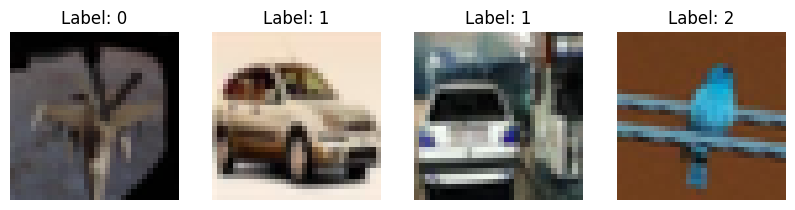

In [ ]:
import matplotlib.pyplot as plt
import random

# Function to visualize four random images
def visualize_random_images(images, labels):
    # Randomly select four indices from the dataset
    random_indices = random.sample(range(len(images)), 4)

    plt.figure(figsize=(10, 5))

    # Display four random images from the training set
    for i, idx in enumerate(random_indices):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[idx])  # Show the randomly selected image
        plt.title(f"Label: {labels[idx]}")  # Display the label as title
        plt.axis('off')  # Turn off axis for better visualization

    plt.show()

# Call the visualization function with train images and labels
visualize_random_images(train_images, train_labels)



In [ ]:
# Split the dataset into training and validation sets with 10% for validation
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.1, random_state=42, stratify=train_labels)

# Print sizes of the new train and validation sets
print("New size of training set (after split):", len(train_images))
print("Size of validation set:", len(val_images))


New size of training set (after split): 1350
Size of validation set: 150


In [ ]:
# Function to flatten the images from 32x32x3 to 1024
def flatten_images(images):
    flattened_images = images.reshape(images.shape[0], -1)  # Reshape to (num_images, 1024)
    return flattened_images

# Flatten both training and validation sets
train_images_flat = flatten_images(train_images)
val_images_flat = flatten_images(val_images)

# Print the shape of the flattened images
print("Shape of flattened training images:", train_images_flat.shape)
print("Shape of flattened validation images:", val_images_flat.shape)


Shape of flattened training images: (1350, 3072)
Shape of flattened validation images: (150, 3072)


In [ ]:
# Function to normalize the images (pixel values in range [0, 1])
def normalize_images(images):
    normalized_images = images / 255.0  # Scale pixel values to [0, 1]
    return normalized_images

# Normalize both the training and validation sets
train_images_normalized = normalize_images(train_images_flat)
val_images_normalized = normalize_images(val_images_flat)

# Print the range of pixel values to confirm normalization
print("Min and Max pixel values in the training set after normalization:")
print("Min:", train_images_normalized.min(), "Max:", train_images_normalized.max())


Min and Max pixel values in the training set after normalization:
Min: 0.0 Max: 1.0


In [ ]:


# Build the FCNN model
def build_fcnn_model(input_size):
    model = models.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=(input_size,)))

    # First hidden layer with 256 neurons and ReLU activation
    model.add(layers.Dense(256, activation='relu'))

    # Second hidden layer with 128 neurons and ReLU activation
    model.add(layers.Dense(128, activation='relu'))

    # Third hidden layer with 64 neurons and ReLU activation
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with 3 neurons (one for each class) and softmax activation for probabilities
    model.add(layers.Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # For multi-class classification
                  metrics=['accuracy'])

    return model

# Build the model
model = build_fcnn_model(input_size=3072)  # Input size is 3072 (flattened images)

# Summarize the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 828,035 (3.16 MB)

 Trainable params: 828,035 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model for 500 epochs
history = model.fit(
    train_images_normalized,
    train_labels,
    epochs=500,
    batch_size=200,
    validation_data=(val_images_normalized, val_labels),
    verbose=1
)
# Save the model after training
model.save('fcnnmodel.h5')


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 1.2972e-04 - val_accuracy: 0.7200 - val_loss: 2.0467
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 1.2699e-04 - val_accuracy: 0.7200 - val_loss: 2.0555
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 1.3062e-04 - val_accuracy: 0.7200 - val_loss: 2.0583
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.3409e-04 - val_accuracy: 0.7200 - val_loss: 2.0495
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.3669e-04 - val_accuracy: 0.7200 - val_loss: 2.0523
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.3139e-04 - val_accuracy: 0.7200 - val_loss: 2.0539
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.1748e-04 - val_accuracy: 0.7200 - val_loss: 2.0620
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 1.3737e-04 - val_ac

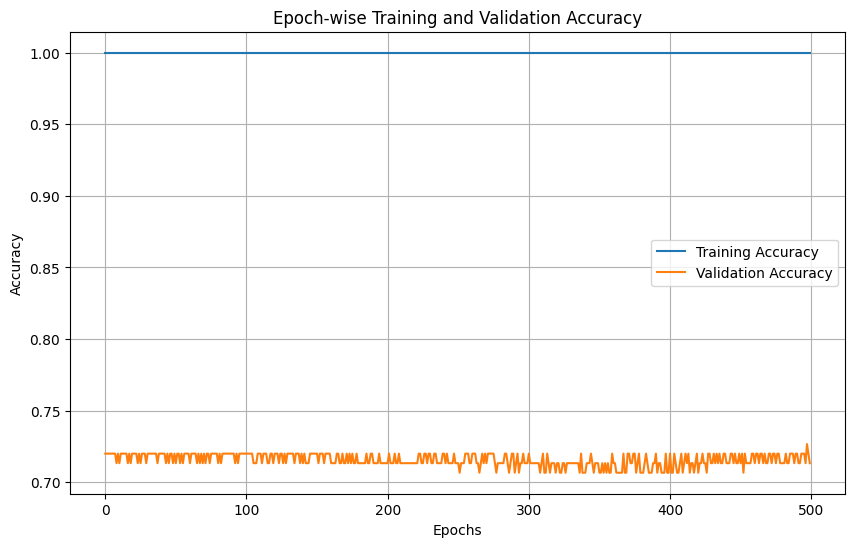

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch-wise Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def load_test_images(data_dir):
    images = []
    labels = []
    test_path = os.path.join(data_dir, 'test')
    for label in ['0', '1', '2']:
        class_path = os.path.join(test_path, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Ensure RGB format
                img = img.resize((32, 32))  # Resize to 32x32
                img_array = np.array(img)
                images.append(img_array)
                labels.append(int(label))  # Convert label to integer
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


def normalize_images(images):
    images = images.astype('float32') / 255.0
    return images

# Load the test dataset
data_dir = "/content/drive/MyDrive/cifar-3class-data (2)/"
test_images, test_labels = load_test_images(data_dir)

# Normalize the test images
test_images = normalize_images(test_images)


from tensorflow.keras.models import load_model
model = load_model('fcnnmodel.h5')  # Assuming the model is saved with this name

# Step d: Predict the class probabilities
test_images_flat = test_images.reshape(test_images.shape[0], -1)  # Flatten the images correctly
predictions = model.predict(test_images_flat)
print(predictions)


predicted_classes = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(test_labels, predicted_classes)


test_accuracy = np.sum(predicted_classes == test_labels) / len(test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
[[3.10276728e-03 3.22357863e-01 6.74539387e-01]
 [9.37345088e-01 6.26549050e-02 1.34659686e-10]
 [4.14382806e-03 3.65444928e-01 6.30411148e-01]
 [5.46349250e-02 1.50414027e-14 9.45365071e-01]
 [1.00000000e+00 1.08012517e-13 1.60934498e-13]
 [1.00000000e+00 1.39399736e-09 1.57994133e-08]
 [1.30666431e-05 2.59479043e-13 9.99986887e-01]
 [9.98425245e-01 3.24959612e-12 1.57481094e-03]
 [9.97603357e-01 2.27142777e-03 1.25199222e-04]
 [1.00000000e+00 2.01633042e-14 5.45181825e-12]
 [6.46932602e-01 3.53067428e-01 1.04623731e-14]
 [9.99999881e-01 1.72246606e-10 6.43200195e-08]
 [9.26915586e-01 2.08509321e-09 7.30844438e-02]
 [9.99982476e-01 1.75209279e-05 4.23606528e-09]
 [4.13464680e-02 1.50548907e-08 9.58653569e-01]
 [9.99999881e-01 7.44106332e-10 8.37142551e-08]
 [6.91232528e-18 9.54688192e-14 1.00000000e+00]
 [5.57558342e-05 3.05798054e-09 9.99944210e-01]
 [9.99995470e-01 4.44482839e-06 9.28206134e-08]
 [9.99999881e-01 1.01063833e-07 2.82554691e-11]


Question 2 - CNN

In [ ]:
import os
import numpy as np
from PIL import Image

# Step a: Function to load train images from folder
def load_train_images(data_dir):
    # Initialize lists to hold images and labels
    images = []
    labels = []

    # Define path to the train folder
    train_path = os.path.join(data_dir, 'train')

    # Iterate through each class folder ('0', '1', '2')
    for label in ['0', '1', '2']:
        class_path = os.path.join(train_path, label)

        # List all files in the class directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Open the image, convert to RGB, and resize if needed
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Ensure the image has 3 channels (RGB)
                img = img.resize((32, 32))  # Resize to 32x32 if necessary
                img_array = np.array(img)  # Convert to numpy array

                # Append image and label to the lists
                images.append(img_array)
                labels.append(int(label))  # Convert label to integer

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Step a: Load the training dataset using the function
data_dir = "/content/drive/MyDrive/cifar-3class-data"
train_images, train_labels = load_train_images(data_dir)

# Print the shape of the loaded train images and labels
print("Shape of train images:", train_images.shape)
print("Shape of train labels:", train_labels.shape)


Shape of train images: (1500, 32, 32, 3)
Shape of train labels: (1500,)


In [ ]:
# Step b: Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Print the shapes of the new train and validation sets
print("Shape of training images:", train_images.shape)
print("Shape of validation images:", val_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of validation labels:", val_labels.shape)

Shape of training images: (1350, 32, 32, 3)
Shape of validation images: (150, 32, 32, 3)
Shape of training labels: (1350,)
Shape of validation labels: (150,)


In [ ]:
# Step c: Normalize the images (convert pixel values to the range [0, 1])
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0

# Print the range of values for the first image to confirm normalization
print("Min value of train image pixels:", train_images.min())
print("Max value of train image pixels:", train_images.max())


Min value of train image pixels: 0.0
Max value of train image pixels: 1.0


In [ ]:
import tensorflow as tf

# Step d: Define the CNN model
model = models.Sequential()

# Convolutional Layer 1: 64 filters, 3x3 kernel, 'same' padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Convolutional Layer 2: 64 filters, 3x3 kernel, 'same' padding
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max Pooling Layer 1: Reducing dimensions (2x2)
model.add(layers.MaxPooling2D((2, 2), padding='valid'))

# Convolutional Layer 3: 128 filters, 3x3 kernel, 'same' padding
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Convolutional Layer 4: 128 filters, 3x3 kernel, 'same' padding
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Max Pooling Layer 2: Reducing dimensions (2x2)
model.add(layers.MaxPooling2D((2, 2), padding='valid'))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layer 1: 512 neurons
model.add(layers.Dense(512, activation='relu'))

# Fully Connected Layer 2: 100 neurons
model.add(layers.Dense(100, activation='relu'))

# Output Layer: 3 neurons (for 3 classes), with softmax activation for classification
model.add(layers.Dense(3, activation='softmax'))

# Print the model summary to confirm the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,506,579 (17.19 MB)

 Trainable params: 4,506,579 (17.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step e: Compile the CNN model
model.compile(
    loss='categorical_crossentropy',  # Categorical crossentropy for multi-class classification
    optimizer='adam',                 # Adam optimizer
    metrics=['accuracy']             # Track accuracy
)

# Convert the labels to categorical format (one-hot encoding)
train_labels_categorical = tf.keras.utils.to_categorical(train_labels, 3)
val_labels_categorical = tf.keras.utils.to_categorical(val_labels, 3)

# Step e: Train the model
history = model.fit(
    train_images, train_labels_categorical,  # Training data and labels
    epochs=50,                             # Number of epochs
    batch_size=200,                        # Batch size
    validation_data=(val_images, val_labels_categorical),  # Validation data
    verbose=2                              # Display progress
)

# Save the model after training
model.save('cnn_model.h5')

# Print the training history (if needed)
print("Training History:", history.history)


Epoch 1/50
7/7 - 4s - 576ms/step - accuracy: 0.8230 - loss: 1.2893 - val_accuracy: 0.6600 - val_loss: 0.8322
Epoch 2/50
7/7 - 0s - 31ms/step - accuracy: 0.8593 - loss: 0.4048 - val_accuracy: 0.7867 - val_loss: 0.5229
Epoch 3/50
7/7 - 0s - 31ms/step - accuracy: 0.9119 - loss: 0.2748 - val_accuracy: 0.8333 - val_loss: 0.4019
Epoch 4/50
7/7 - 0s - 31ms/step - accuracy: 0.9444 - loss: 0.1687 - val_accuracy: 0.8600 - val_loss: 0.4133
Epoch 5/50
7/7 - 0s - 33ms/step - accuracy: 0.9763 - loss: 0.0931 - val_accuracy: 0.8733 - val_loss: 0.3927
Epoch 6/50
7/7 - 0s - 42ms/step - accuracy: 0.9919 - loss: 0.0425 - val_accuracy: 0.8733 - val_loss: 0.4263
Epoch 7/50
7/7 - 0s - 32ms/step - accuracy: 0.9978 - loss: 0.0210 - val_accuracy: 0.8600 - val_loss: 0.5424
Epoch 8/50
7/7 - 0s - 43ms/step - accuracy: 0.9993 - loss: 0.0119 - val_accuracy: 0.8533 - val_loss: 0.5246
Epoch 9/50
7/7 - 0s - 42ms/step - accuracy: 0.9993 - loss: 0.0074 - val_accuracy: 0.8400 - val_loss: 0.5826
Epoch 10/50
7/7 - 0s - 31ms

Training History: {'accuracy': [0.8229629397392273, 0.8592592477798462, 0.9118518233299255, 0.9444444179534912, 0.9762963056564331, 0.9918518662452698, 0.9977777600288391, 0.9992592334747314, 0.9992592334747314, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.2893223762512207, 0.40483516454696655, 0.274847149848938, 0.16869448125362396, 0.09308857470750809, 0.0425335168838501, 0.02103281207382679, 0.011868290603160858, 0.007434693165123463, 0.004656744189560413, 0.00318119116127491, 0.0026245720218867064, 0.0018308794824406505, 0.0013831908581778407, 0.0010798490839079022, 0.0008498052484355867, 0.0006851619109511375, 0.0005884162383154035, 0.0004881907079834491, 0.00042408995795994997, 0.0003626326797530055, 0.00030745327239856124, 0.00026464113034307957, 0.00022429543605539948, 0.00019484224321786314, 0.00015685014659

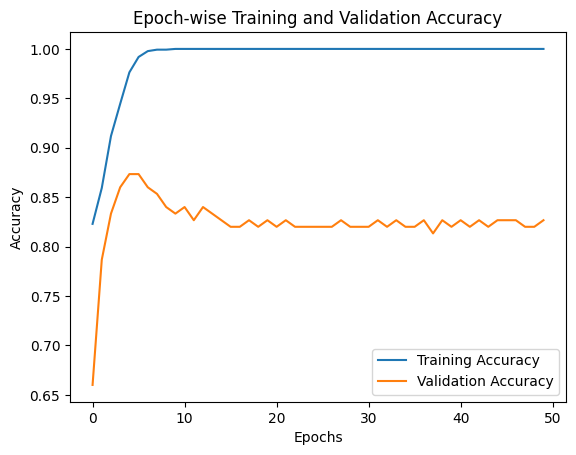

In [ ]:
# Step g: Plot the training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.title('Epoch-wise Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def load_test_images(data_dir):
    images = []
    labels = []
    test_path = os.path.join(data_dir, 'test')
    for label in ['0', '1', '2']:
        class_path = os.path.join(test_path, label)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Ensure RGB format
                img = img.resize((32, 32))  # Resize to 32x32
                img_array = np.array(img)
                images.append(img_array)
                labels.append(int(label))  # Convert label to integer
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


def normalize_images(images):
    images = images.astype('float32') / 255.0
    return images

# Load the test dataset
data_dir = "/content/drive/MyDrive/cifar-3class-data"
test_images, test_labels = load_test_images(data_dir)

# Normalize the test images
test_images = normalize_images(test_images)


from tensorflow.keras.models import load_model
model = load_model('cnn_model.h5')  # Assuming the model is saved with this name

# Step d: Predict the class probabilities
test_images_flat = test_images.reshape(test_images.shape[0], 32, 32, 3)  # Add a channel dimension
predictions = model.predict(test_images_flat)
print(predictions)


predicted_classes = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(test_labels, predicted_classes)


test_accuracy = np.sum(predicted_classes == test_labels) / len(test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[9.99999762e-01 2.08194621e-07 2.27448460e-09]
 [1.00000000e+00 1.18164405e-18 1.85877390e-11]
 [9.48377092e-08 6.99600438e-04 9.99300241e-01]
 [9.21644011e-12 1.28486455e-13 1.00000000e+00]
 [1.00000000e+00 3.13326393e-10 4.71487531e-18]
 [9.93913352e-01 8.51287041e-05 6.00159401e-03]
 [9.99377251e-01 2.96903169e-09 6.22674241e-04]
 [9.99999762e-01 2.48883964e-07 2.98757134e-12]
 [9.86067891e-01 1.81820017e-08 1.39320549e-02]
 [2.58210778e-01 7.41789162e-01 8.95064005e-08]
 [1.00000000e+00 2.45230359e-19 3.09846926e-09]
 [9.96091783e-01 2.57907834e-10 3.90817458e-03]
 [2.29468718e-02 5.50019839e-12 9.77053165e-01]
 [1.88758243e-02 9.81124222e-01 7.67583357e-14]
 [1.00000000e+00 1.23036076e-12 3.16432747e-09]
 [2.35609750e-05 2.22216790e-13 9.99976397e-01]
 [9.99988437e-01 2.94767292e-12 1.15262546e-05]
 [4.24971700e-01 4.90439925e-06 5.75023413e-01]
 [2.46282411e-03 9.97454345e-01 8.29037890e-05]
 [1.00000000e+00 3.97578602e-11 2.33325415e-10]


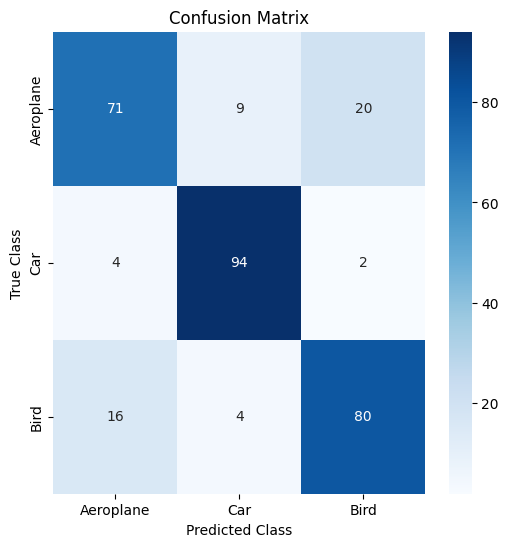

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Aeroplane', 'Car', 'Bird'], yticklabels=['Aeroplane', 'Car', 'Bird'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [ ]:
test_accuracy = np.sum(predicted_classes == test_labels) / len(test_labels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 81.67%
